# Rain prediction in Australia


<img src="../images/1786.webp" height=500 width=700>

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


import os
import sys


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [42]:
from tools import fill_missing_values, create_month, print_missing
from tools import assessClassifier, assessClassifier_cv, testClassifier
from tools import modify_data

***
# Define supporting function
***

In [43]:
def convert_to_numeric(val):
    if val == "No":
        return 0
    else:
        return 1

In [44]:
import warnings
warnings.filterwarnings('ignore') # suppress warnings

# 1. Load and Research the Data 

In [45]:
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [46]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [48]:
corr_matrix = df.corr()
corr_matrix # print correlation matrix 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [49]:
new_df = df.copy()
new_df.RainTomorrow = df.RainTomorrow.apply(convert_to_numeric).copy()
new_df.RainTomorrow.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [50]:
#sns.pairplot(new_df[:2000]) # Build pair plot for first 2000 values(otherwise takes too long)

In [51]:
fontsize = 20;

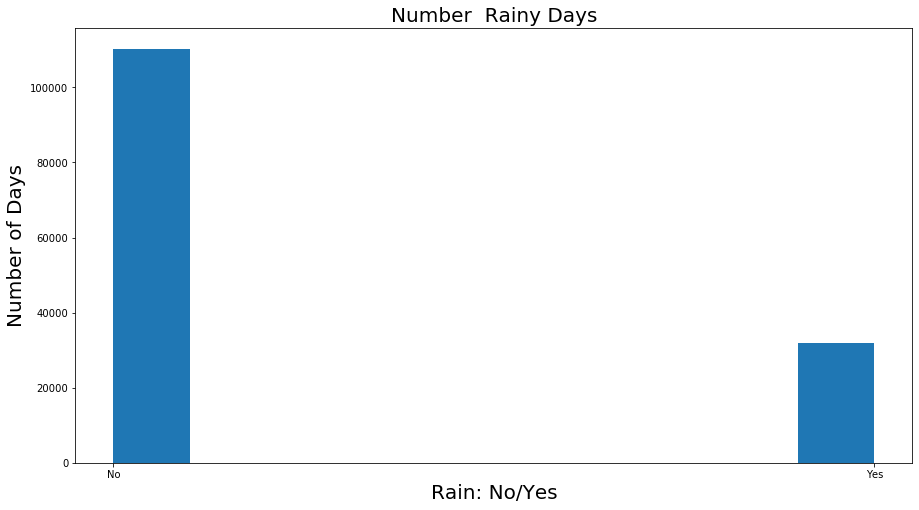

In [52]:
plt.figure(figsize=(15, 8));
ax = plt.axes
plt.title("Number  Rainy Days",fontsize=fontsize);
plt.hist(df.RainTomorrow.dropna(axis=0))
plt.xlabel("Rain: No/Yes",fontsize=fontsize)
plt.ylabel("Number of Days", fontsize=fontsize)
plt.show()

In [53]:
create_month(new_df)

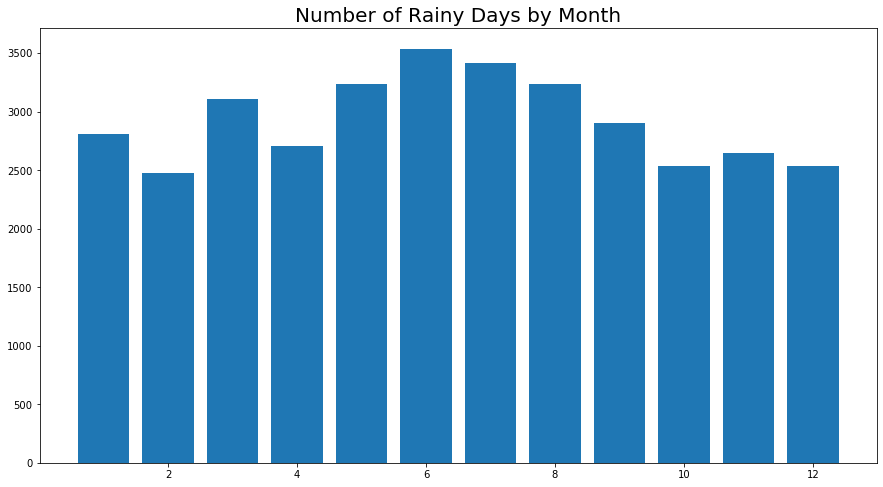

In [54]:
r = new_df.groupby('Month')['RainTomorrow'].sum()
r = r.reset_index()
r
plt.figure(figsize=(15,8));
plt.bar(r.Month,r.RainTomorrow);
plt.title("Number of Rainy Days by Month",fontsize=fontsize);
plt.show()

**Comments on the pairplots: There are few linear relations with high values of the r pearson coefficient.**

***
# Split the data to put a test dataset away and not use it until the very end  
***

In [55]:
X = df.drop('RainTomorrow',axis=1) # Create the data without target column
y = df.RainTomorrow # assign the target column
X_short = X.sample(frac=1)
y_short = y[list(X_short.index)]
X_train, X_test, y_train, y_test = train_test_split(X_short, y_short, test_size=0.3, random_state=0) # split the data into train/test datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

***
# Prepare Data 
***

***
### It seems logical to create a column with the "Month" and drop the column with the "Date". I will call create_month function to do that.
***

In [56]:
create_month(X_train)
X_train.head() # Check the result

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
20063,NorahHead,9.0,18.1,0.0,NaN,NaN,SSE,33.0,NaN,SSE,...,73.0,62.0,1031.8,1029.8,NaN,NaN,12.9,16.2,No,8
92962,GoldCoast,13.6,22.3,2.0,NaN,NaN,NaN,NaN,S,SSE,...,67.0,59.0,1021.4,1019.9,NaN,NaN,18.8,21.1,Yes,8
13180,Moree,17.5,33.5,0.0,8.6,12.6,ENE,35.0,NE,SW,...,67.0,34.0,1016.5,1013.6,2.0,5.0,22.9,32.3,No,2
69973,Melbourne,9.0,18.4,0.4,3.2,7.4,NNW,50.0,N,NNW,...,60.0,47.0,1013.7,1009.6,7.0,5.0,12.3,17.2,No,5
76830,Portland,11.4,14.9,6.8,2.0,6.1,NW,61.0,SW,S,...,54.0,64.0,1017.1,1018.7,4.0,7.0,13.1,13.1,Yes,4


***
# Dealing with missing values...
### Checking missing values: total and percent
***

In [57]:
print_missing(X_train) # Print number of missing values together with percent

**************************************************
               Total   Percent
Sunshine       34058  0.477839
Evaporation    30651  0.430039
Cloud3pm       29107  0.408376
Cloud9am       27423  0.384749
Pressure9am     7388  0.103655
Pressure3pm     7367  0.103360
WindDir9am      5223  0.073280
WindGustDir     5142  0.072143
WindGustSpeed   5111  0.071708
Humidity3pm     2224  0.031203
WindDir3pm      2125  0.029814
Temp3pm         1800  0.025254
Rainfall        1653  0.023192
RainToday       1653  0.023192
WindSpeed3pm    1540  0.021606
Humidity9am     1310  0.018380
WindSpeed9am     915  0.012838
Temp9am          874  0.012262
MinTemp          745  0.010452
MaxTemp          610  0.008558
Month              0  0.000000
Location           0  0.000000
**************************************************


***
## There are a lot of missing values in nnunmerical columns.<br>
* ## I don't want to drop all these values. 
* ## I am going to use the median of the values for this column with the same location and the same month to fill in the missing values.
* ## I will, also, create an array called "save" with all the data that is inserted for missing values to use it later for the missing value for the test data that I put aside. "save" array is later converted into a data frame "saved_median" so it would be easier to use. 
***

In [58]:
save = [] # preparing an empty array to store the median values we use here to re-use later for Test Data 
cols = [cl for cl in X_train.columns if X_train[cl].dtype in ['float64']] # Numerical Columns
for location in X_train.Location.unique():
    print(f"Working on Location: {location}")
    for month in X_train.Month.unique():
        save_info = [location]
        for column in cols:
            median_for_month = X_train[(X_train.Location == location) 
                                           & (X_train.Month == month)][column].median()
            if np.isnan(median_for_month):
                median_for_month = X_train[(X_train.Month == month)][column].median()
            idx = list(X_train[(X_train.Location == location)
                                     & (X_train.Month == month)
                                     & (X_train[column].isna())].index)
            X_train.loc[idx,column] = median_for_month
            save_info.append(median_for_month)
        save_info.append(month)
        save.append(save_info)

Working on Location: NorahHead
Working on Location: GoldCoast
Working on Location: Moree
Working on Location: Melbourne
Working on Location: Portland
Working on Location: Newcastle
Working on Location: Cobar
Working on Location: Townsville
Working on Location: Ballarat
Working on Location: Wollongong
Working on Location: Launceston
Working on Location: Mildura
Working on Location: WaggaWagga
Working on Location: Watsonia
Working on Location: Nuriootpa
Working on Location: Albany
Working on Location: CoffsHarbour
Working on Location: PerthAirport
Working on Location: Uluru
Working on Location: Woomera
Working on Location: Williamtown
Working on Location: BadgerysCreek
Working on Location: Katherine
Working on Location: Cairns
Working on Location: Canberra
Working on Location: MountGambier
Working on Location: Sydney
Working on Location: Adelaide
Working on Location: Richmond
Working on Location: SydneyAirport
Working on Location: NorfolkIsland
Working on Location: Penrith
Working on Loc

In [59]:
X_train.head() # Check if everything went okay

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
20063,NorahHead,9.0,18.1,0.0,3.05,7.9,SSE,33.0,NaN,SSE,...,73.0,62.0,1031.8,1029.8,4.0,5.0,12.9,16.2,No,8
92962,GoldCoast,13.6,22.3,2.0,3.05,7.9,NaN,37.0,S,SSE,...,67.0,59.0,1021.4,1019.9,4.0,5.0,18.8,21.1,Yes,8
13180,Moree,17.5,33.5,0.0,8.60,12.6,ENE,35.0,NE,SW,...,67.0,34.0,1016.5,1013.6,2.0,5.0,22.9,32.3,No,2
69973,Melbourne,9.0,18.4,0.4,3.20,7.4,NNW,50.0,N,NNW,...,60.0,47.0,1013.7,1009.6,7.0,5.0,12.3,17.2,No,5
76830,Portland,11.4,14.9,6.8,2.00,6.1,NW,61.0,SW,S,...,54.0,64.0,1017.1,1018.7,4.0,7.0,13.1,13.1,Yes,4


In [60]:
saved_median = pd.DataFrame(save,columns=['Location']+cols+ ['Month']) # Save the values I used to fill in missing ones for later use as data frame
saved_median.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
0,NorahHead,10.50,18.50,0.0,3.05,7.9,37.0,11.0,17.0,65.0,62.0,1020.05,1017.25,4.0,5.0,14.45,16.90,8
1,NorahHead,20.00,26.40,0.0,7.00,10.0,44.0,15.0,22.0,81.0,74.0,1015.70,1014.10,5.0,5.0,22.70,24.80,2
2,NorahHead,13.10,20.60,0.0,2.80,7.1,33.0,11.0,15.0,72.0,67.0,1021.90,1019.10,5.0,5.0,16.30,19.20,5
3,NorahHead,16.65,22.95,0.2,4.00,8.1,41.0,9.0,20.0,78.5,70.0,1020.00,1017.90,5.0,5.0,19.40,21.65,4
4,NorahHead,9.70,17.10,0.0,2.20,6.5,35.0,13.0,15.0,71.0,62.0,1021.85,1019.50,5.0,5.0,12.60,15.95,7


## Check how balanced the data is for the target column

In [61]:
y_train.value_counts()

No     54007
Yes    15679
Name: RainTomorrow, dtype: int64

## It is not balanced but it is not too bad

# 2. Data preprocessing

In [62]:
num_columns = [column for column in X_train.columns if X_train[column].dtype == 'float64'] # Save numerical columns into array so it is easier to use
str_columns= ['WindGustDir','WindDir9am','WindDir3pm','Location'] # Save object columns into array so it is easier to use

In [63]:

num_pipline = Pipeline([
    ('std_scaler', StandardScaler()),
]) # Define a pipeline for scaling the data

In [64]:
X_train[num_columns] = num_pipline.fit_transform(X_train[num_columns])
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
20063,NorahHead,-0.497649,-0.716417,-0.272220,-0.607128,-0.064531,SSE,-0.524302,NaN,SSE,...,0.209060,0.502576,2.081505,2.158346,-0.312149,0.097477,-0.620332,-0.787754,No,8
92962,GoldCoast,0.221440,-0.125382,-0.038480,-0.607128,-0.064531,NaN,-0.221706,S,SSE,...,-0.107511,0.357154,0.550342,0.687446,-0.312149,0.097477,0.286762,-0.083542,Yes,8
13180,Moree,0.831102,1.450710,-0.272220,0.994001,1.503091,ENE,-0.373004,NE,SW,...,-0.107511,-0.854697,-0.171072,-0.248582,-1.121300,0.097477,0.917116,1.526086,No,2
69973,Melbourne,-0.497649,-0.674200,-0.225472,-0.563855,-0.231299,NNW,0.761730,N,NNW,...,-0.476844,-0.224534,-0.583308,-0.842885,0.901578,0.097477,-0.712579,-0.644037,No,5
76830,Portland,-0.122472,-1.166729,0.522497,-0.910045,-0.664897,NW,1.593868,SW,S,...,-0.793415,0.599525,-0.082736,0.509155,-0.312149,0.984930,-0.589583,-1.233276,Yes,4


***
## Let's encode categorical features using one-hot-encoding.
***

In [65]:
ohe = pd.get_dummies(data=X_train, columns=str_columns,drop_first=True)
ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71275 entries, 20063 to 78981
Columns: 111 entries, MinTemp to Location_Woomera
dtypes: float64(16), int64(1), object(1), uint8(93)
memory usage: 19.2+ MB


In [66]:
from sklearn import preprocessing

ohe['RainToday'] = X_train['RainToday'].astype(str)
ohe['RainTomorrow'] =y_train.astype(str)

lb = preprocessing.LabelBinarizer()

ohe['RainToday'] = lb.fit_transform(ohe['RainToday'])
ohe['RainTomorrow'] = lb.fit_transform(ohe['RainTomorrow'])

**Drop missing values and create target column y and data X**

In [67]:
ohe = ohe.dropna()
y_train = ohe['RainTomorrow']
X_train = ohe.drop(['RainTomorrow'], axis=1)

In [68]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
20063,-0.497649,-0.716417,-0.272220,-0.607128,-0.064531,-0.524302,-1.576747,0.613947,0.209060,0.502576,...,0,0,0,0,0,0,0,0,0,0
92962,0.221440,-0.125382,-0.038480,-0.607128,-0.064531,-0.221706,1.571397,0.046301,-0.107511,0.357154,...,0,0,0,0,0,0,0,0,0,0
13180,0.831102,1.450710,-0.272220,0.994001,1.503091,-0.373004,0.334626,-0.180757,-0.107511,-0.854697,...,0,0,0,0,0,0,0,0,0,0
69973,-0.497649,-0.674200,-0.225472,-0.563855,-0.231299,0.761730,0.559493,0.159830,-0.476844,-0.224534,...,0,0,0,0,0,0,0,0,0,0
76830,-0.122472,-1.166729,0.522497,-0.910045,-0.664897,1.593868,0.334626,-0.634874,-0.793415,0.599525,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y_train.head()

20063    1
92962    0
13180    1
69973    1
76830    1
Name: RainTomorrow, dtype: int64

In [70]:
X_test, y_test = modify_data(X_test,y_test, saved_median,str_columns,num_columns,lb, num_pipline)
X_val, y_val = modify_data(X_val,y_val, saved_median,str_columns,num_columns,lb, num_pipline)
allValues= (X_train,X_val, y_train,y_val)

--------------------------------------------------
Modifying Data
--------------------------------------------------
Workin on Location:  Nuriootpa
Workin on Location:  Woomera
Workin on Location:  Darwin
Workin on Location:  Katherine
Workin on Location:  MelbourneAirport
Workin on Location:  Perth
Workin on Location:  MountGinini
Workin on Location:  WaggaWagga
Workin on Location:  SydneyAirport
Workin on Location:  Richmond
Workin on Location:  Sydney
Workin on Location:  Moree
Workin on Location:  Adelaide
Workin on Location:  Walpole
Workin on Location:  Hobart
Workin on Location:  Mildura
Workin on Location:  Canberra
Workin on Location:  Watsonia
Workin on Location:  Brisbane
Workin on Location:  CoffsHarbour
Workin on Location:  Cairns
Workin on Location:  NorahHead
Workin on Location:  Bendigo
Workin on Location:  Witchcliffe
Workin on Location:  Albany
Workin on Location:  GoldCoast
Workin on Location:  Sale
Workin on Location:  PerthAirport
Workin on Location:  Dartmoor
Work

***
## Here I preprocess the Test Data that will not be used for training <br> but will be used at the end to test how well our model performs
***

In [71]:
X_test.head() # Check few rows to check if everything is fine

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
103259,0.612249,-0.167599,8.680043,0.936303,-0.431421,0.307836,0.559493,1.068063,1.369819,0.599525,...,0,0,0,0,0,0,0,0,0,0
107007,0.455925,1.084831,-0.272220,1.859477,1.069493,0.080889,0.671927,-1.316048,-0.793415,-1.678756,...,0,0,0,0,0,0,0,0,0,1
141681,1.894103,1.281843,-0.272220,0.820906,0.335713,-0.373004,-0.339977,0.613947,-0.213035,-0.224534,...,0,0,0,0,0,0,0,0,0,0
142813,-0.185002,1.295915,-0.272220,0.186224,-0.531482,-0.902547,-0.902145,-1.429577,-0.476844,-1.000119,...,0,0,0,0,0,0,0,0,0,0
64529,-0.247531,-0.392755,-0.272220,0.186224,-0.664897,0.913028,0.671927,0.046301,-0.213035,0.211732,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X_val.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
104470,-1.513753,-1.434102,-0.178724,-1.140838,-0.264653,-0.070408,-0.789711,0.386889,1.633628,1.132739,...,0,0,0,0,0,0,0,0,0,0
139197,1.800309,1.591433,-0.272220,2.032572,0.602542,0.459134,0.334626,0.613947,-0.424082,-0.854697,...,0,0,0,0,0,0,0,0,0,0
19698,0.096381,-0.800850,2.298926,-0.852346,-0.531482,1.064325,0.896794,2.089826,0.947725,0.647999,...,0,0,0,0,0,0,0,0,0,0
39510,-1.122944,-1.560752,-0.225472,0.186224,-0.064531,-0.524302,-0.339977,-0.634874,1.000487,0.308680,...,0,0,0,1,0,0,0,0,0,0
64565,0.393396,1.239626,-0.272220,1.801778,1.703213,-0.751249,-0.902145,-1.088990,-0.001988,-1.000119,...,0,0,0,0,0,0,0,0,0,0


# 3. Model building

***
# I create a bunch of baseline classifiers:
* LogisticRegression()
* RandomForestClassifier()
* KNeighborsClassifier()
* SVC()
* XGBClassifier()
* GaussianNB()
### I will train them and compare results based on <br> f1 score as a primary metric and precision as a secondary
***

In [73]:
clf_Logistic = LogisticRegression(class_weight='balanced')
clf_Forest = RandomForestClassifier(class_weight='balanced')
clf_KNN = KNeighborsClassifier()
clf_XGBoost = XGBClassifier(class_weight='balanced')
clf_NaiveB = GaussianNB()

In [74]:
from sklearn.metrics import classification_report
details = {'name':[],'f1':[],'precision':[],'recall':[],'roc_auc_score':[], 'accuracy':[]} # create empty dictionary to hold results
classifiers = [clf_Logistic, clf_Forest, clf_XGBoost, clf_NaiveB] # array of classifiers clf_KNN,
for clf in classifiers:#, clf_KNN,clf_SVC, clf_XGBoost, clf_NaiveB]: # use loop to train "vanilla" classifiers and update 'details'
    print(f"Working on {str(clf)}")
    results = assessClassifier(clf, allValues)
    clf.fit(allValues[0],allValues[2])

    y_pred = clf.predict(X_test)
    print("\n", "*"*50, "\nConfusion Matrix \n", confusion_matrix(y_test,y_pred), '\n')
    print(classification_report(y_test,y_pred))
    for item in results.keys():
        details[item].append(results[item])

Working on LogisticRegression(class_weight='balanced')

 ************************************************** 
Confusion Matrix 
 [[ 8162  2392]
 [ 7003 26081]] 

              precision    recall  f1-score   support

           0       0.54      0.77      0.63     10554
           1       0.92      0.79      0.85     33084

    accuracy                           0.78     43638
   macro avg       0.73      0.78      0.74     43638
weighted avg       0.82      0.78      0.80     43638

Working on RandomForestClassifier(class_weight='balanced')

 ************************************************** 
Confusion Matrix 
 [[ 5444  5110]
 [ 1501 31583]] 

              precision    recall  f1-score   support

           0       0.78      0.52      0.62     10554
           1       0.86      0.95      0.91     33084

    accuracy                           0.85     43638
   macro avg       0.82      0.74      0.76     43638
weighted avg       0.84      0.85      0.84     43638

Working on XGBClassi

In [75]:
df = pd.DataFrame(details)
df # print results

,name,f1,precision,recall,roc_auc_score,accuracy
0,LogisticRegression,0.847040,0.919174,0.785404,0.783169,0.784332
1,RandomForestClassifier,0.903852,0.860664,0.951604,0.731470,0.846073
2,XGBClassifier,0.904891,0.874117,0.937912,0.754738,0.850100
3,GaussianNB,0.736349,0.868751,0.638967,0.666383,0.652110


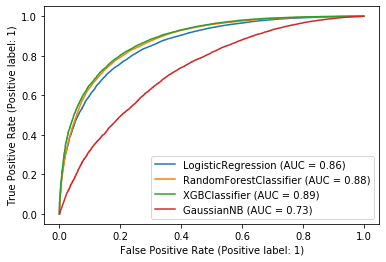

In [76]:
# Plot roc curve to compare results
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, X_test, y_test, ax=ax)
plt.show()

***
# OverUnderSampling
***

In [77]:
"""
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.pipeline import make_pipeline
over = SMOTE()
under = RandomUnderSampler()
steps = [('0',over),('u',under)]
pipeline = make_pipeline(SMOTE(),RandomUnderSampler())
X_train,y_train = pipeline.fit_resample(X_train,y_train)
counter = Counter(y_train)
print(counter)
"""

"\nfrom imblearn.over_sampling import SMOTE\nfrom collections import Counter\nfrom imblearn.pipeline import make_pipeline\nover = SMOTE()\nunder = RandomUnderSampler()\nsteps = [('0',over),('u',under)]\npipeline = make_pipeline(SMOTE(),RandomUnderSampler())\nX_train,y_train = pipeline.fit_resample(X_train,y_train)\ncounter = Counter(y_train)\nprint(counter)\n"

***
# End OverUnderSampling
***

In [78]:
cv = 5
scoring = 'precision'
values = (X_train, X_test, y_train, y_test)
random_state =10

***
## Tune up Logistic Regression
***

In [79]:
c_space = np.logspace(-10, 18, 30)
param_grid_LG = {'C': c_space,
    'penalty': ['l1', 'l2'],
    'max_iter': [100,500],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [80]:
logistic = testClassifier(LogisticRegression(random_state=random_state), param_grid=param_grid_LG, scoring=scoring, values=values)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


KeyboardInterrupt: 

In [126]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10546
           1       0.76      1.00      0.86     33092

    accuracy                           0.76     43638
   macro avg       0.38      0.50      0.43     43638
weighted avg       0.58      0.76      0.65     43638



In [127]:
# Tuning Random forest 
param_grid_rf = [{'bootstrap':[True],'n_estimators':[3,5,10,20,30,50,80,120],
    'max_features':['auto'],
    'max_depth' : [5,10,20, 30, 40, 50 ,60 , 70],
    'criterion':['gini', 'entropy']},]
random_forest = testClassifier(RandomForestClassifier(random_state=random_state), param_grid=param_grid_rf, scoring=scoring, values=values)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.8min finished
**************************************************
** Results for Training Data **
**************************************************
[[ 4331 12847]
 [  779 53318]] : is the confustion matrix

0.8088249736934409 : is the accuracy score
0.8058339000982393 : is the precision score
0.9855999408469971 : is the recall score
0.8866973773926927 : is the f1 score
**************************************************
**************************************************
** Results for Testing Data **
** not used for training/validation **
**************************************************
[[ 2637  7909]
 [  560

In [128]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.25      0.38     10546
           1       0.80      0.98      0.88     33092

    accuracy                           0.81     43638
   macro avg       0.81      0.62      0.63     43638
weighted avg       0.81      0.81      0.76     43638



In [129]:
# hgboost tune up
param_grid_xgb = {
    'max_depth':range(2,10,2),
    'n_estimators': range(20,60,20),
    'learning_rate': [0.1, 0.01, 0.05]
}
xgboost = testClassifier(XGBClassifier(random_state=random_state),
                        param_grid=param_grid_xgb,
                        scoring=scoring,
                        values=values)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 27.1min finished
[00:21:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
**************************************************
** Results for Training Data **
**************************************************
[[ 4533 12645]
 [ 1175 52922]] : is the confustion matrix

0.8061031217116801 : is the accuracy score
0.8071438376012323 : is the precision score
0.9782797567332754 : is the recall score
0.8845099612247627 : is the f1 score
**************************************************
**************************************************
** Results for T

In [130]:
y_pred = xgboost.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.27      0.41     10546
           1       0.81      0.98      0.88     33092

    accuracy                           0.81     43638
   macro avg       0.80      0.63      0.65     43638
weighted avg       0.80      0.81      0.77     43638



***
#  Comments on Vanilla Classifiers 
### I will use Logistic Regression, Random Forest, and XGB classifiers<br> for tune ups and comparison since the have the highest f1 scores.
***

***
# Conclusion
***